<a href="https://colab.research.google.com/github/satish35/K_means/blob/main/K_means2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import statistics
import cv2
import time

In [13]:
data = pd.read_csv('/content/IRIS.csv')
print(data.head())
print(type(data))
# print(len(data['Spending Score (1-100)']))
# print(len(data['Age']))

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>


In [81]:
class k_means_2Di:
  def __init__(self,k,x,y):
    self.dic_x={}
    self.dic_y= {}
    self.dic_xi= {}
    self.dic_yi ={}
    self.mean_x=[]
    self.mean_y=[]
    self.flag=0
    self.var=0
    self.x_point=self.scaler(x)
    self.y_point=self.scaler(y)
    self.iter=0
    self.x_f=[]
    self.y_f=[]
    self.k=k
    self.main_call()

  def scaler(self,x):
    min= x.min()
    print(min)
    max= x.max()
    print(max)
    for i in range(0, len(x)):
      x[i]=(x[i]-min)/(max-min)
    return x

  def main_call(self):
    dist =[]
    # for i in range(0, self.k):
    #   x= random.randint(1, len(self.x_point))-1
    #   self.dic_x[i]= []
    #   self.dic_xi[i] = str(self.x_point[x])
    #   self.dic_y[i]= []
    #   self.dic_yi[i] = str(self.y_point[x])
    self.dic_xi[0]=(1.3-1)/(6.9-1)
    self.dic_x[0]=[]
    self.dic_xi[1]=(4.0-1)/(6.9-1)
    self.dic_x[1]=[]
    self.dic_xi[2]=(5.5-1)/(6.9-1)
    self.dic_x[2]=[]
    self.dic_yi[0]=(0.2-0.1)/(2.5-0.1)
    self.dic_y[0]=[]
    self.dic_yi[1]=(1.25-0.1)/(2.5-0.1)
    self.dic_y[1]=[]
    self.dic_yi[2]=(2.0-0.1)/(2.5-0.1)
    self.dic_y[2]=[]
    while(True):
      self.iter=self.iter+1
      for i in range(0, len(self.x_point)):
        for j in range(0, self.k):
          d_x= round(pow(round(abs(float(self.dic_xi[j])-self.x_point[i]), 2), 2), 2)
          d_y= round(pow(round(abs(float(self.dic_yi[j])-self.y_point[i]), 2), 2), 2)
          dist.append(math.sqrt(d_x + d_y))
        a= dist.index(min(dist))
        dist.clear()
        self.dic_y[a].append(self.y_point[i])
        self.dic_x[a].append(self.x_point[i])
      for b in self.dic_xi.keys():
        if(len(self.dic_x[b])==0):
          self.mean_x.append(0)
          self.mean_y.append(0)
        else:
          self.mean_x.append(statistics.mean(self.dic_x[b]))
          self.mean_y.append(statistics.mean(self.dic_y[b]))
      for f in range(0,self.k):
        self.x_f.append(round(float(self.dic_xi[f]), 2))
        self.y_f.append(round(float(self.dic_yi[f]), 2))
        if str(self.mean_x[f]) == self.dic_xi[f] and str(self.mean_y[f]) == self.dic_yi[f]:
          continue
        else:
          self.flag=1
      if self.flag==0:
        print("No. of iteration {}".format(self.iter))
        # self.plot_graph()
        self.inertia_cal()
        break
      self.x_f.clear()
      self.y_f.clear()
      self.dic_x.clear()
      self.dic_y.clear()
      self.dic_xi.clear()
      self.dic_yi.clear()
      self.flag=0
      for g in range(0,self.k):
        self.dic_x[g] = []
        self.dic_y[g] = []
        self.dic_xi[g] = str(self.mean_x[g])
        self.dic_yi[g] = str(self.mean_y[g])
      self.mean_x.clear()
      self.mean_y.clear()
  def plot_graph(self):
    print(self.dic_xi)
    print(self.dic_yi)
    color=['blue','yellow','green','black','purple']
    # color=['blue','green', 'red','yellow']
    plt.scatter(self.x_point, self.y_point,c='blue')
    plt.figure(1 , figsize = (15 , 7) )
    plt.clf()
    for i in range(0, self.k):
      plt.scatter(self.dic_x[i], self.dic_y[i],c=color[i])
    plt.scatter(self.x_f, self.y_f,c='red')
    plt.show()

  def inertia_cal(self):
    for g in range(0, self.k):
      for x in range(0, len(self.dic_x[g])):
        xd= pow(round(float(self.dic_xi[g])-self.dic_x[g][x], 2), 2)
        yd= pow(round(float(self.dic_yi[g])-self.dic_y[g][x], 2), 2)
        self.var = self.var+ (xd+yd)

In [126]:
# inertia= []
# for n in range(1, 15):
#   res = k_means_2Di(n,np.array(data['Age']), np.array(data['Spending Score (1-100)'])).var
#   print(res)
#   inertia.append(res)
# print(inertia)
# plt.figure(1 , figsize = (15 ,6))
# plt.plot(np.arange(1 , 15) , inertia , 'o')
# plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
# plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
# plt.show()
start= time.time()
k1=k_means_2Di(3,np.array(data['petal_length']), np.array(data['petal_width']))
end= time.time()
print((end-start)*10**3)

1.0
6.9
0.1
2.5
No. of iteration 3
40.56978225708008


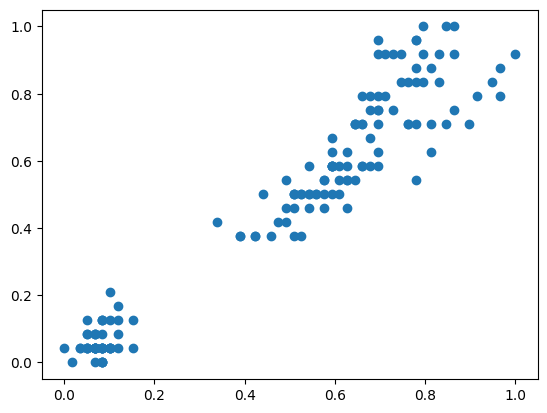

In [74]:
def scaler(x):
    min= x.min()
    max= x.max()
    for i in range(0, len(x)):
      x[i]=(x[i]-min)/(max-min)
    return x
plt.scatter(scaler(np.array(data['petal_length'])), scaler(np.array(data['petal_width'])))
plt.show()